In [1]:
import glob 
import numpy as np
from functions import dice_coef_EV, dice_coef_girino, dice_coef_lung, jaccard_coef, calcula_metricas, online_dice
from utils import load_images_array
from skimage.io import imread, imshow

import matplotlib.pyplot as plt
import matplotlib.image as img 

In [2]:
TEMPO = []
ORIGINAL_SIZE = 5
NEW_SIZE = 4

### Teste 01 - Pasta com 01 volume

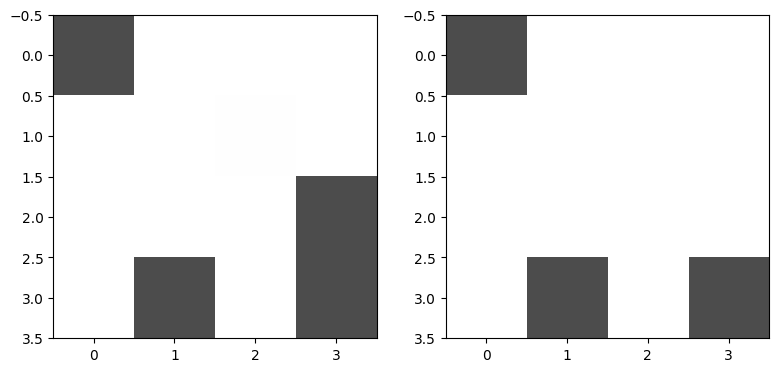

In [3]:
fig, (ax_1, ax_2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
img_1 = imread('./imgs_testes_metricas/imgs_nv_img_unica/gt/gt_1.png', as_gray=True) 
img_2 = imread('./imgs_testes_metricas/imgs_nv_img_unica/pred/pred_1.png', as_gray=True) 
imshow(img_1, ax=ax_1)
imshow(img_2, ax=ax_2)
plt.show()


In [4]:
def gabarito_1(a,b, intercessao):
    dice = 2*intercessao/(a+b)
    print(f'Dice: {dice}')

In [5]:
gabarito_1(4,3,3)

Dice: 0.8571428571428571


In [6]:
# Choose train folder TM40 ou TM46
_folder = './imgs_testes_metricas/imgs_nv_img_unica' #teste_' + str(i)
# _folder = './dados_girino/TM46_40prod'

GT_imgs = sorted(glob.glob(_folder + '/gt/*')) 
pred_imgs = sorted(glob.glob(_folder + '/pred/*'))

gt = load_images_array(GT_imgs, new_size = NEW_SIZE)
pred = load_images_array(pred_imgs, new_size = NEW_SIZE)

In [7]:
print(f'GT: {gt.shape}\nPred: {pred.shape}')

GT: (1, 4, 4, 1)
Pred: (1, 4, 4, 1)


In [8]:
# VERSÃO ATUAL GIRINO
# Calcula iou e dice para todas as imagens deste fold (i)
# não funciona com imread
dice_list = []
dice_list = calcula_metricas(gt, pred)  

#estatística
print(f'Dice list: {dice_list}')
mean = round(np.mean(dice_list), 4)
print(f'Coeficiente Dice (Versão do Laboratório): {mean}')

Dice list: [0.9600000000000001]
Coeficiente Dice (Versão do Laboratório): 0.96


### Teste 02 - Pasta com 02 volumes

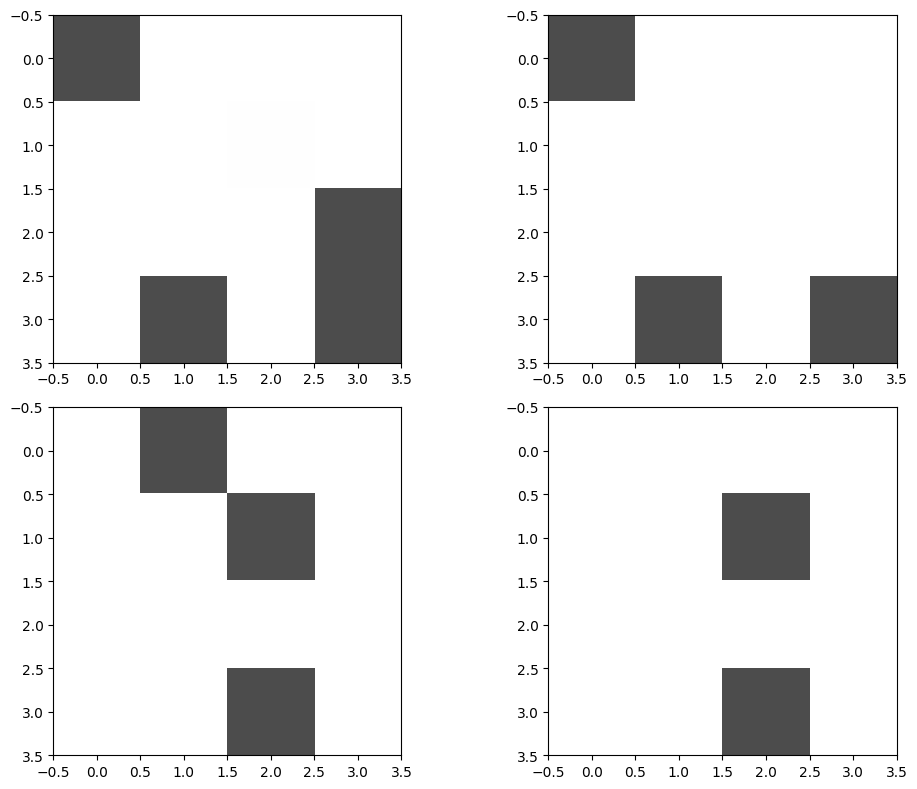

In [9]:
fig, ((ax_1, ax_2), (ax_3, ax_4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
img_1 = imread('./imgs_testes_metricas/imgs_nv/gt/gt_1.png', as_gray=True) 
img_2 = imread('./imgs_testes_metricas/imgs_nv/pred/pred_1.png', as_gray=True) 
img_3 = imread('./imgs_testes_metricas/imgs_nv/gt/gt_2.png', as_gray=True) 
img_4 = imread('./imgs_testes_metricas/imgs_nv/pred/pred_2.png', as_gray=True) 
imshow(img_1, ax=ax_1)
imshow(img_2, ax=ax_2)
imshow(img_3, ax=ax_3)
imshow(img_4, ax=ax_4)
plt.show()


In [10]:
gabarito_1(12,13,12)

Dice: 0.96


In [11]:
gabarito_1(13,14,13)

Dice: 0.9629629629629629


In [12]:
TEMPO = []
ORIGINAL_SIZE = 5
NEW_SIZE = 4

In [13]:
# Choose train folder TM40 ou TM46
_folder = './imgs_testes_metricas/imgs_nv' 

GT_imgs = sorted(glob.glob(_folder + '/gt/*')) 
pred_imgs = sorted(glob.glob(_folder + '/pred/*'))

gt = load_images_array(GT_imgs, new_size = NEW_SIZE)
pred = load_images_array(pred_imgs, new_size = NEW_SIZE)

In [14]:
print(f'GT: {gt.shape}\nPred: {pred.shape}')

GT: (2, 4, 4, 1)
Pred: (2, 4, 4, 1)


In [15]:
# VERSÃO ATUAL GIRINO
# Calcula iou e dice para todas as imagens deste fold (i)
# não funciona com imread
dice_list = []
dice_list = calcula_metricas(gt, pred)  

#estatística
print(f'Dice list: {dice_list}')
mean = round(np.mean(dice_list), 4)
print(f'Coeficiente Dice (Versão do Laboratório): {mean}')

Dice list: [0.9600000000000001, 0.962962962962963]
Coeficiente Dice (Versão do Laboratório): 0.9615


### Novo teste

In [16]:
img_1 = imread('./imgs_testes_metricas/imgs_nv/gt/gt_1.png', as_gray=True) 
img_2 = imread('./imgs_testes_metricas/imgs_nv/pred/pred_1.png', as_gray=True) 

In [43]:
def gabarito_2(pred, gt, value_mask=255):
    a = sum(pred==value_mask).sum()
    print(f'a: {a}')
    b = sum(gt==value_mask).sum()
    print(f'b: {b}')
    inter=0
    for i in range(pred.shape[0]):
        for j in range(pred.shape[1]):
            if pred[i,j]==gt[i,j] and pred[i,j]==value_mask:
                inter +=1
    print(f'inter: {inter}')
    dice = 2*inter/(a+b)
    return dice

In [44]:
x = gabarito_2(img_1, img_2)
x

a: 95955
b: 57342
inter: 56326


0.7348610866487929

In [19]:
img_1 = imread('./imgs_testes_metricas/imgs_nv/gt/gt_2.png', as_gray=True) 
img_2 = imread('./imgs_testes_metricas/imgs_nv/pred/pred_2.png', as_gray=True) 

In [20]:
x = gabarito_2(img_1, img_2)
x

0.9629629629629629

In [21]:
def gabarito(pred, gt, value_mask=76):
    a = sum(pred==value_mask).sum()
    b = sum(gt==value_mask).sum()
    inter=0
    for i in range(img_1.shape[0]):
        for j in range(img_1.shape[1]):
            if (img_1[i,j]==img_2[i,j]) and (img_1[i,j]!=value_mask) or (img_1[i,j]==77) and (img_1[i,j]!=value_mask):
                inter +=1
    dice = 2*inter/(a+b)
    return dice

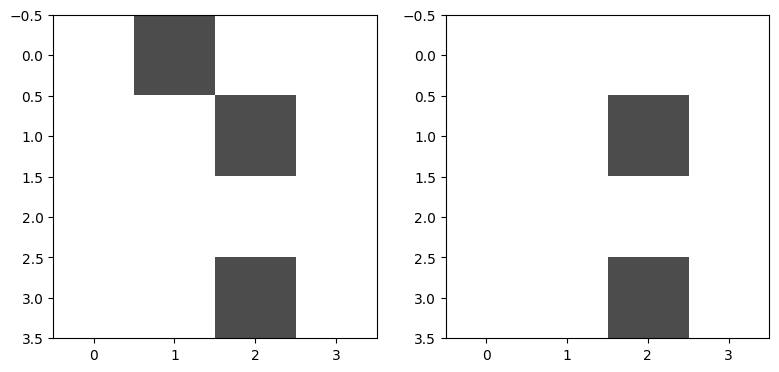

In [22]:
fig, (ax_1, ax_2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
imshow(img_1, ax=ax_1)
imshow(img_2, ax=ax_2)
plt.show()

In [23]:
x = gabarito_1(3,2,2)
x

Dice: 0.8


#### Testando com pulmao

##### Função gabarito

In [45]:
img_1 = imread('./imgs_testes_metricas/am_imgs_3/conjunto_a/Fig1.tif', as_gray=True) 
img_2 = imread('./imgs_testes_metricas/am_imgs_3/conjunto_b/Fig2.tif', as_gray=True) 

In [46]:
img_1.shape

(512, 512)

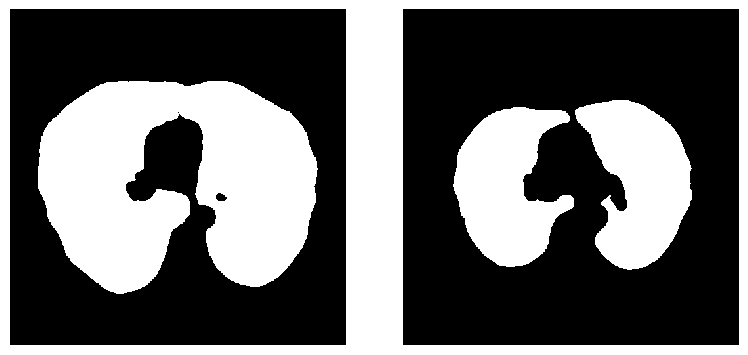

In [35]:
fig, (ax_1, ax_2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
imshow(img_1, ax=ax_1)
imshow(img_2, ax=ax_2)
ax_1.axis('off')
ax_2.axis('off')
plt.show()

In [38]:
x = gabarito_2(img_1, img_2)
x

0.7348610866487929

In [47]:
TEMPO = []
ORIGINAL_SIZE = 512
NEW_SIZE = 512

In [48]:
# Choose train folder TM40 ou TM46
_folder = './imgs_testes_metricas/am_imgs_3' #teste_' + str(i)
# _folder = './dados_girino/TM46_40prod'

GT_imgs = sorted(glob.glob(_folder + '/conjunto_a/*')) 
pred_imgs = sorted(glob.glob(_folder + '/conjunto_b/*'))

gt = load_images_array(GT_imgs, new_size = NEW_SIZE)
pred = load_images_array(pred_imgs, new_size = NEW_SIZE)

In [49]:
print(f'GT: {gt.shape}\nPred: {pred.shape}')

GT: (1, 512, 512, 1)
Pred: (1, 512, 512, 1)


In [50]:
# VERSÃO ATUAL GIRINO
# Calcula iou e dice para todas as imagens deste fold (i)
# não funciona com imread
dice_list = []
dice_list = calcula_metricas(gt, pred)  

#estatística
print(f'Dice list: {dice_list}')
mean = round(np.mean(dice_list), 4)
print(f'Coeficiente Dice (Versão do Laboratório): {mean}')

Dice list: [0.7348610866487929]
Coeficiente Dice (Versão do Laboratório): 0.7349


In [31]:
set(np.reshape(img_1, img_1.shape[0]*img_1.shape[1]))

{0, 255}